In [1]:
import pandas as pd
import re
pd.set_option('display.max_rows', None)

This cell imports the scraped data.

In [2]:
df = pd.read_csv('accum_data.csv')
df_original = df.copy(deep = True)

In [3]:
df.head(30)

,name,year,price,body type,transmission,drivetrain,fuel,power,cylinders,engine cap,bore stroke,compression,torque,speed,acceleration
0,Audi A3 1.9 TDI Ambition technical specs,july 2006,€ 34.650,"3-doors, hatchback",6 speed automatic,front,diesel,77 kw (105 hp),"4, in line",1896 cc,"79,5 x 95,5 mm","19,0 :1",250 nm,187 km/h,"11,1 s"
1,Audi A3 2.0 FSI Ambition technical specs,june 2005,€ 33.890,"3-doors, hatchback",6 speed automatic,front,gasoline,110 kw (150 hp),"4, in line",1984 cc,"82,5 x 92,8 mm","11,5 :1",200 nm,209 km/h,"9,5 s"
2,Audi A3 2.0 T FSI Ambition technical specs,october 2004,€ 37.090,"3-doors, hatchback",6 speed automatic,front,gasoline,147 kw (200 hp),"4, in line",1984 cc,"82,5 x 92,8 mm","10,5 :1",280 nm,235 km/h,"6,9 s"
3,Audi A3 Cabriolet 1.2 TFSI Attraction technica...,march 2010,€ 30.330,"2-doors, convertible",5 speed manual transmission,front,gasoline,77 kw (105 hp),"4, in line",1197 cc,"71,0 x 75,6 mm","10,0 :1",175 nm,188 km/h,"12,2 s"
4,Audi A3 1.8 5V Turbo Attraction technical specs,july 1999,€ 26.909,"5-doors, hatchback",5 speed manual transmission,front,gasoline,110 kw (150 hp),"4, in line",1781 cc,"81,0 x 86,4 mm","9,5 :1",210 nm,217 km/h,"8,2 s"
5,Audi A3 1.6 Attraction technical specs,june 2005,€ 24.225,"3-doors, hatchback",5 speed manual transmission,front,gasoline,75 kw (102 hp),"4, in line",1595 cc,"81,0 x 77,4 mm","10,3 :1",148 nm,185 km/h,"11,9 s"
6,Audi A3 1.9 TDI Attraction Pro Line technical ...,january 2009,€ 30.385,"3-doors, hatchback",5 speed manual transmission,front,diesel,77 kw (105 hp),"4, in line",1896 cc,"79,5 x 95,5 mm","18,5 :1",250 nm,187 km/h,"11,4 s"
7,Audi A1 Sportback 25 TFSI technical specs,january 2019,€ 23.900,"5-doors, hatchback",5 speed manual transmission,front,gasoline,70 kw (95 hp),"3, in line",999 cc,"74,5 x 76,4 mm","10,5 :1",175 nm,191 km/h,"10,8 s"
8,Audi A3 Cabriolet 1.4 TFSI COD 140hp Pro Line ...,january 2014,€ 45.620,"2-doors, convertible",7 speed automatic with double clutch,front,gasoline,103 kw (140 hp),"4, in line",1395 cc,"74,5 x 80,0 mm","10,5 :1",250 nm,218 km/h,"9,1 s"
9,Audi A3 Limousine 2.0 TDI Attraction technical...,june 2015,€ 37.860,"4-doors, sedan",6 speed automatic with double clutch,front,diesel,110 kw (150 hp),"4, in line",1968 cc,"81,0 x 95,5 mm","16,2 :1",340 nm,224 km/h,"8,3 s"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098 entries, 0 to 1097
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          1098 non-null   object
 1   year          1055 non-null   object
 2   price         1098 non-null   object
 3   body type     1098 non-null   object
 4   transmission  1098 non-null   object
 5   drivetrain    1098 non-null   object
 6   fuel          1093 non-null   object
 7   power         1055 non-null   object
 8   cylinders     1093 non-null   object
 9   engine cap    1093 non-null   object
 10  bore stroke   1093 non-null   object
 11  compression   1093 non-null   object
 12  torque        1055 non-null   object
 13  speed         1098 non-null   object
 14  acceleration  1098 non-null   object
dtypes: object(15)
memory usage: 128.8+ KB


Remove rows containing N/A values

In [5]:
df = df[~df.isna().any(axis=1)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1050 entries, 0 to 1097
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          1050 non-null   object
 1   year          1050 non-null   object
 2   price         1050 non-null   object
 3   body type     1050 non-null   object
 4   transmission  1050 non-null   object
 5   drivetrain    1050 non-null   object
 6   fuel          1050 non-null   object
 7   power         1050 non-null   object
 8   cylinders     1050 non-null   object
 9   engine cap    1050 non-null   object
 10  bore stroke   1050 non-null   object
 11  compression   1050 non-null   object
 12  torque        1050 non-null   object
 13  speed         1050 non-null   object
 14  acceleration  1050 non-null   object
dtypes: object(15)
memory usage: 131.2+ KB


In [6]:
df.head()

,name,year,price,body type,transmission,drivetrain,fuel,power,cylinders,engine cap,bore stroke,compression,torque,speed,acceleration
0,Audi A3 1.9 TDI Ambition technical specs,july 2006,€ 34.650,"3-doors, hatchback",6 speed automatic,front,diesel,77 kw (105 hp),"4, in line",1896 cc,"79,5 x 95,5 mm","19,0 :1",250 nm,187 km/h,"11,1 s"
1,Audi A3 2.0 FSI Ambition technical specs,june 2005,€ 33.890,"3-doors, hatchback",6 speed automatic,front,gasoline,110 kw (150 hp),"4, in line",1984 cc,"82,5 x 92,8 mm","11,5 :1",200 nm,209 km/h,"9,5 s"
2,Audi A3 2.0 T FSI Ambition technical specs,october 2004,€ 37.090,"3-doors, hatchback",6 speed automatic,front,gasoline,147 kw (200 hp),"4, in line",1984 cc,"82,5 x 92,8 mm","10,5 :1",280 nm,235 km/h,"6,9 s"
3,Audi A3 Cabriolet 1.2 TFSI Attraction technica...,march 2010,€ 30.330,"2-doors, convertible",5 speed manual transmission,front,gasoline,77 kw (105 hp),"4, in line",1197 cc,"71,0 x 75,6 mm","10,0 :1",175 nm,188 km/h,"12,2 s"
4,Audi A3 1.8 5V Turbo Attraction technical specs,july 1999,€ 26.909,"5-doors, hatchback",5 speed manual transmission,front,gasoline,110 kw (150 hp),"4, in line",1781 cc,"81,0 x 86,4 mm","9,5 :1",210 nm,217 km/h,"8,2 s"


Remove month from year column

In [7]:
def clean_year(year):
    result = int(re.sub(r'[a-z]', '', year ).strip())
    return result

df['year'] = df['year'].apply(clean_year)

Remove euro sysmbol and commas, convert euros to dollars.

In [8]:
def clean_price(price):
    euro = re.sub(r'[^\d]','', price)
    dollar = 1.17*int(euro)
    return  int(dollar)
df['price'] = df['price'].apply(clean_price) #dollars

Remove parentheses from pwoer and split into list to find horsepower

In [9]:
def clean_horsepower(horse):
    result = int(horse.replace('(','').split()[2])
    return result
df['power'] = df['power'].apply(clean_horsepower) #hp

Capture numerical data in cylinder column

In [10]:
def clean_cylinder(cylinder):
    result = int(re.sub(r'[^\d]','', cylinder))
    return  result
df['cylinders'] = df['cylinders'].apply(clean_cylinder) #number of cylinders

Capture numerical data in engine capacity column

In [11]:
def clean_engine(cap):
    result = int(re.sub(r'[^\d]','', cap))
    return  result
df['engine cap'] = df['engine cap'].apply(clean_engine) #cc

Remove blank data from dataframe

In [12]:
df = df[~((df['bore stroke'] == 'n.b.') | (df['compression'] == 'n.b.') | (df['speed'] == '- km/h') | (df['acceleration'] == '- s'))]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 931 entries, 0 to 1097
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          931 non-null    object
 1   year          931 non-null    int64 
 2   price         931 non-null    int64 
 3   body type     931 non-null    object
 4   transmission  931 non-null    object
 5   drivetrain    931 non-null    object
 6   fuel          931 non-null    object
 7   power         931 non-null    int64 
 8   cylinders     931 non-null    int64 
 9   engine cap    931 non-null    int64 
 10  bore stroke   931 non-null    object
 11  compression   931 non-null    object
 12  torque        931 non-null    object
 13  speed         931 non-null    object
 14  acceleration  931 non-null    object
dtypes: int64(5), object(10)
memory usage: 116.4+ KB


Replace comma was decimal point in bore stroke and convert centimeters to inch

In [14]:
def clean_bore(val):
    val = val.replace(',', '.').split()
    bore = round(float(val[0])/25.4,2)
    return bore
df['bore'] = df['bore stroke'].apply(clean_bore) #in

Replace comma was decimal point in bore stroke and convert centimeters to inch

In [15]:
def clean_stroke(val):
    val = val.replace(',', '.').split()
    stroke = round(float(val[2])/25.4,2)
    return stroke
df['stroke'] = df['bore stroke'].apply(clean_stroke) #in

In [16]:
df = df.drop('bore stroke', axis = 1)

Replace comma with decimal point and isolate ratio term in compression column

In [17]:
def clean_compression(comp):
    comp = float(comp.replace(',','.').split()[0])
    return comp
df['compression'] = df['compression'].apply(clean_compression) #19:1

Remove missing torque data

In [18]:
df = df[~(df['torque'] == '- nm')]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 929 entries, 0 to 1097
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          929 non-null    object 
 1   year          929 non-null    int64  
 2   price         929 non-null    int64  
 3   body type     929 non-null    object 
 4   transmission  929 non-null    object 
 5   drivetrain    929 non-null    object 
 6   fuel          929 non-null    object 
 7   power         929 non-null    int64  
 8   cylinders     929 non-null    int64  
 9   engine cap    929 non-null    int64  
 10  compression   929 non-null    float64
 11  torque        929 non-null    object 
 12  speed         929 non-null    object 
 13  acceleration  929 non-null    object 
 14  bore          929 non-null    float64
 15  stroke        929 non-null    float64
dtypes: float64(3), int64(5), object(8)
memory usage: 123.4+ KB


Remove text and convert newton meters to foot pounds in torque column

In [19]:
def clean_torque(torque):
    torque = float(re.sub(r'[^\d]','', torque))
    torque = round(torque/1.356, 2)
    return torque

df['torque'] = df['torque'].apply(clean_torque) #foot-pounds

Remove text and convert kilometers per hour to miles per hour in speed column

In [20]:
def clean_speed(speed):
    speed = int(re.sub(r'[^\d]','', speed))/1.609
    return int(round(speed, 0)) #mile per hour

df['speed'] = df['speed'].apply(clean_speed)

Replace comma with decimal point in acceleration column

In [21]:
def clean_acceleration(accel):
    accel = accel.replace(',','.').split()[0]
    return float(accel) #second

df['acceleration'] = df['acceleration'].apply(clean_acceleration)

Create a new column for car make from information in name column

In [22]:
def get_make(make):
    make = make.split()[0]
    return make
df['make'] = df['name'].apply(get_make)

Remove cars that are less than $7,000 and greater than $200,000.

In [23]:
df = df[(df['price'] < 200000) & (df['price']>7000)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 917 entries, 0 to 1097
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          917 non-null    object 
 1   year          917 non-null    int64  
 2   price         917 non-null    int64  
 3   body type     917 non-null    object 
 4   transmission  917 non-null    object 
 5   drivetrain    917 non-null    object 
 6   fuel          917 non-null    object 
 7   power         917 non-null    int64  
 8   cylinders     917 non-null    int64  
 9   engine cap    917 non-null    int64  
 10  compression   917 non-null    float64
 11  torque        917 non-null    float64
 12  speed         917 non-null    int64  
 13  acceleration  917 non-null    float64
 14  bore          917 non-null    float64
 15  stroke        917 non-null    float64
 16  make          917 non-null    object 
dtypes: float64(5), int64(6), object(6)
memory usage: 129.0+ KB


Remove rows that are duplicates

In [24]:
df.drop_duplicates('name', inplace = True)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 898 entries, 0 to 1097
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          898 non-null    object 
 1   year          898 non-null    int64  
 2   price         898 non-null    int64  
 3   body type     898 non-null    object 
 4   transmission  898 non-null    object 
 5   drivetrain    898 non-null    object 
 6   fuel          898 non-null    object 
 7   power         898 non-null    int64  
 8   cylinders     898 non-null    int64  
 9   engine cap    898 non-null    int64  
 10  compression   898 non-null    float64
 11  torque        898 non-null    float64
 12  speed         898 non-null    int64  
 13  acceleration  898 non-null    float64
 14  bore          898 non-null    float64
 15  stroke        898 non-null    float64
 16  make          898 non-null    object 
dtypes: float64(5), int64(6), object(6)
memory usage: 126.3+ KB


Reorder columns for easier analysis

In [25]:
cols = df.columns.tolist()
cols[0] = 'price'
cols[1] = 'make'
cols[2] = 'year'
cols[16] = 'name'
cols

['price',
 'make',
 'year',
 'body type',
 'transmission',
 'drivetrain',
 'fuel',
 'power',
 'cylinders',
 'engine cap',
 'compression',
 'torque',
 'speed',
 'acceleration',
 'bore',
 'stroke',
 'name']

In [26]:
df = df[cols]

Reset index of cleaned dataframe

In [27]:
df = df.reset_index(drop = True)
df.head()

,price,make,year,body type,transmission,drivetrain,fuel,power,cylinders,engine cap,compression,torque,speed,acceleration,bore,stroke,name
0,40540,Audi,2006,"3-doors, hatchback",6 speed automatic,front,diesel,105,4,1896,19.0,184.37,116,11.1,3.13,3.76,Audi A3 1.9 TDI Ambition technical specs
1,39651,Audi,2005,"3-doors, hatchback",6 speed automatic,front,gasoline,150,4,1984,11.5,147.49,130,9.5,3.25,3.65,Audi A3 2.0 FSI Ambition technical specs
2,43395,Audi,2004,"3-doors, hatchback",6 speed automatic,front,gasoline,200,4,1984,10.5,206.49,146,6.9,3.25,3.65,Audi A3 2.0 T FSI Ambition technical specs
3,35486,Audi,2010,"2-doors, convertible",5 speed manual transmission,front,gasoline,105,4,1197,10.0,129.06,117,12.2,2.80,2.98,Audi A3 Cabriolet 1.2 TFSI Attraction technica...
4,31483,Audi,1999,"5-doors, hatchback",5 speed manual transmission,front,gasoline,150,4,1781,9.5,154.87,135,8.2,3.19,3.40,Audi A3 1.8 5V Turbo Attraction technical specs


Save cleaned dataframe

In [28]:
df.to_csv('clean_data.csv')

## Exploratory anaylsis to try to group brands by a price category

In [29]:
df_cat = df[['make', 'price']]
df_cat.head()

,make,price
0,Audi,40540
1,Audi,39651
2,Audi,43395
3,Audi,35486
4,Audi,31483


In [30]:
df_make = df_cat.groupby('make', as_index = False)['price'].mean().round(0).sort_values('price')

In [31]:
low = df_make[df_make['price'] < 25000]
low_lst = low['make'].values.tolist()
mid = df_make[(df_make['price'] > 25000) & (df_make['price'] < 50000)]
mid_lst = mid['make'].values.tolist()
high = df_make[(df_make['price'] > 50000) & (df_make['price'] < 75000)]
high_lst = high['make'].values.tolist()
sport = df_make[(df_make['price'] > 75000) & (df_make['price'] < 100000)]
sport_lst = sport['make'].values.tolist()
lux = df_make[(df_make['price'] > 100000)]
lux_lst = lux['make'].values.tolist()

<AxesSubplot:>

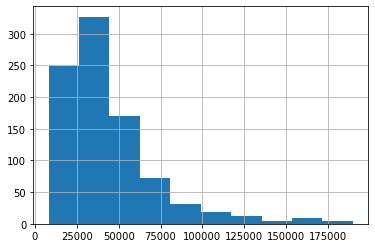

In [32]:
df.price.hist()

In [33]:
def price_range(val):
    if val in low_lst:
        return 'low'
    elif val in mid_lst:
        return 'mid'
    elif val in high_lst:
        return 'high'
    elif val in sport_lst:
        return 'sport'
    else:
        return 'lux'

In [34]:
df['price range'] = df['make'].apply(price_range)
df

,price,make,year,body type,transmission,drivetrain,fuel,power,cylinders,engine cap,compression,torque,speed,acceleration,bore,stroke,name,price range
0,40540,Audi,2006,"3-doors, hatchback",6 speed automatic,front,diesel,105,4,1896,19.00,184.37,116,11.1,3.13,3.76,Audi A3 1.9 TDI Ambition technical specs,high
1,39651,Audi,2005,"3-doors, hatchback",6 speed automatic,front,gasoline,150,4,1984,11.50,147.49,130,9.5,3.25,3.65,Audi A3 2.0 FSI Ambition technical specs,high
2,43395,Audi,2004,"3-doors, hatchback",6 speed automatic,front,gasoline,200,4,1984,10.50,206.49,146,6.9,3.25,3.65,Audi A3 2.0 T FSI Ambition technical specs,high
3,35486,Audi,2010,"2-doors, convertible",5 speed manual transmission,front,gasoline,105,4,1197,10.00,129.06,117,12.2,2.80,2.98,Audi A3 Cabriolet 1.2 TFSI Attraction technica...,high
4,31483,Audi,1999,"5-doors, hatchback",5 speed manual transmission,front,gasoline,150,4,1781,9.50,154.87,135,8.2,3.19,3.40,Audi A3 1.8 5V Turbo Attraction technical specs,high
5,28343,Audi,2005,"3-doors, hatchback",5 speed manual transmission,front,gasoline,102,4,1595,10.30,109.14,115,11.9,3.19,3.05,Audi A3 1.6 Attraction technical specs,high
6,35550,Audi,2009,"3-doors, hatchback",5 speed manual transmission,front,diesel,105,4,1896,18.50,184.37,116,11.4,3.13,3.76,Audi A3 1.9 TDI Attraction Pro Line technical ...,high
7,27963,Audi,2019,"5-doors, hatchback",5 speed manual transmission,front,gasoline,95,3,999,10.50,129.06,119,10.8,2.93,3.01,Audi A1 Sportback 25 TFSI technical specs,high
8,53375,Audi,2014,"2-doors, convertible",7 speed automatic with double clutch,front,gasoline,140,4,1395,10.50,184.37,135,9.1,2.93,3.15,Audi A3 Cabriolet 1.4 TFSI COD 140hp Pro Line ...,high
9,44296,Audi,2015,"4-doors, sedan",6 speed automatic with double clutch,front,diesel,150,4,1968,16.20,250.74,139,8.3,3.19,3.76,Audi A3 Limousine 2.0 TDI Attraction technical...,high
